In [13]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os


%matplotlib widget

## Get the root directory and change to it

In [2]:
rootdir = os.getcwd()
os.chdir(rootdir)

## Data Parsing

In [3]:
count = 0

# Naming convention - gyr(oscope)_s(martphone_location)) and Same for acceleraoemeter
# All the data is stored in a list of dataframes. So, gyr{gaitpos}_s{martphone_location}[0, 1, 2, .....] gives the data as sorted by name in the file directory.
# gyrNormal_s1[0] gives the gyroscope data of the subject180_Normal sample 01 in the normal gait position.
# gyrNormal_s1[1] gives the gyroscope data of the subject180_Normal sample 02 in the normal gait position.
# 
# gyrNormal_s[2] gives the gyroscope data of the subject181_Normal sample 01 in the normal gait position.
# 
# and so on. 

# Create arrays for Raw data
for x in range(250,325,5):
    for y in range(250,325,5):
        # variables of raw the data
        globals()['EPOT_%s_%s' % (x, y)] = []

## Parsing gyroscope and accelerometer data

In [17]:
os.chdir('D:\lectures\sem3\cie\Project B\Project_B_Data\EPOT_Data')
# Get a list for .mat files in current folder
mat_files = glob.glob('*.mat')

# List for stroring all the data
alldata = []

# Iterate mat files
for fname in mat_files:
    # Load mat file data into data.
    data = loadmat(fname)

    # Append data to the list
    alldata.append(data)
len(alldata)

244

In [21]:
data1=alldata[1]

In [22]:
data = pd.DataFrame(data1['num_data'], columns=['Time', '1', '2', '3', '4'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
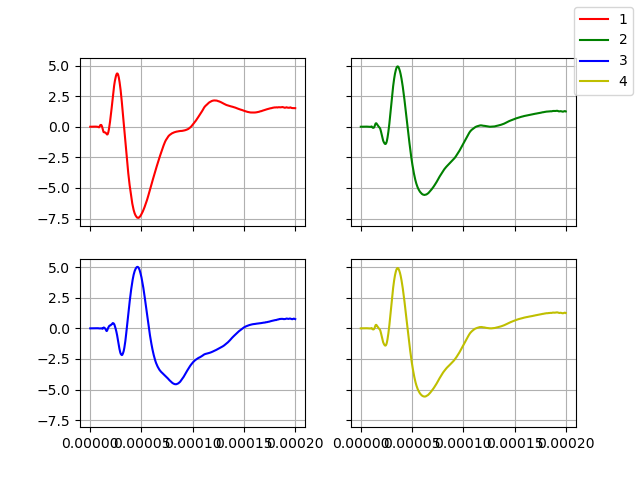

In [23]:
plt.close()
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

axs[0,0].plot(data['Time'], data['1'], label='1', c = 'r')
axs[0,1].plot(data['Time'], data['2'], label='2', c = 'g')
axs[1,0].plot(data['Time'], data['3'], label='3', c = 'b')
axs[1,1].plot(data['Time'], data['4'], label='4', c = 'y')

fig.legend()
axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()
plt.show()